In [1]:
import pandas as pd
import numpy as np

In [2]:
# # Number of rows
# num_rows = 1000000

# # Create sample data with 1,000,000 rows
# data = {
#     'Timestamp': pd.date_range(start='2022-01-01', periods=num_rows, freq='S'),
#     'Ticker': (['AAPL', 'GOOGL', 'MSFT', 'BTC', 'ETH', 'XRP'] * ((num_rows // 6) + 1))[:num_rows],
#     'Price': ([150, 2500, 300, 155, 2550, 310] * ((num_rows // 6) + 1))[:num_rows],
#     'Volume': ([100, 200, 150, 110, 210, 160] * ((num_rows // 6) + 1))[:num_rows],
#     'Buy/Sell': (['Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell'] * ((num_rows // 6) + 1))[:num_rows],
#     'Trader_ID': (['T1', 'T2', 'T3', 'T4', 'T5', 'T6'] * ((num_rows // 6) + 1))[:num_rows],
#     'Exchange': (['NYSE', 'NASDAQ', 'NYSE', 'Binance', 'Bybit', 'Coinbase'] * ((num_rows // 6) + 1))[:num_rows]
# }

# # Convert the dictionary into a DataFrame
# df = pd.DataFrame(data)
# df.to_csv("Exchange_Trade_Data.csv")
exchange_df = pd.read_csv("Exchange_Trade_Data.csv")
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1000000 non-null  int64 
 1   Timestamp   1000000 non-null  object
 2   Ticker      1000000 non-null  object
 3   Price       1000000 non-null  int64 
 4   Volume      1000000 non-null  int64 
 5   Buy/Sell    1000000 non-null  object
 6   Trader_ID   1000000 non-null  object
 7   Exchange    1000000 non-null  object
dtypes: int64(3), object(5)
memory usage: 61.0+ MB


In [ ]:
#info

In [7]:
#head
exchange_df.head()
exchange_df.sample(30)

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
22747,22747,2022-01-01 06:19:07,GOOGL,2500,200,Sell,T2,NASDAQ
158307,158307,2022-01-02 19:58:27,BTC,155,110,Sell,T4,Binance
492696,492696,2022-01-06 16:51:36,AAPL,150,100,Buy,T1,NYSE
273044,273044,2022-01-04 03:50:44,MSFT,300,150,Buy,T3,NYSE
856648,856648,2022-01-10 21:57:28,ETH,2550,210,Buy,T5,Bybit
144947,144947,2022-01-02 16:15:47,XRP,310,160,Sell,T6,Coinbase
350752,350752,2022-01-05 01:25:52,ETH,2550,210,Buy,T5,Bybit
588104,588104,2022-01-07 19:21:44,MSFT,300,150,Buy,T3,NYSE
877440,877440,2022-01-11 03:44:00,AAPL,150,100,Buy,T1,NYSE
416201,416201,2022-01-05 19:36:41,XRP,310,160,Sell,T6,Coinbase


In [8]:
#groupby - Sum

#exchange_df.groupby('Ticker').sum()
#exchange_df.groupby('Ticker')['Volume'].sum()

volume_sum = {}

tickers = exchange_df['Ticker'].unique()
for ticker in tickers:
    sum_volume = exchange_df[exchange_df['Ticker'] == ticker]['Volume'].sum()
    volume_sum[ticker] = sum_volume
volume_sum


{'AAPL': 16666700,
 'GOOGL': 33333400,
 'MSFT': 25000050,
 'BTC': 18333370,
 'ETH': 34999860,
 'XRP': 26666560}

In [9]:
exchange_df.groupby('Ticker')['Volume'].sum()

Ticker
AAPL     16666700
BTC      18333370
ETH      34999860
GOOGL    33333400
MSFT     25000050
XRP      26666560
Name: Volume, dtype: int64

In [10]:
tickers = exchange_df.groupby('Ticker')
tickers.size()

Ticker
AAPL     166667
BTC      166667
ETH      166666
GOOGL    166667
MSFT     166667
XRP      166666
dtype: int64

In [ ]:
# GroupBy Attributes and Methods
# find total number of groups -> len
# find items in each group -> size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [11]:
tickers

In [12]:
tickers.first()
tickers.last()
tickers.nth(5)

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
30,30,2022-01-01 00:00:30,AAPL,150,100,Buy,T1,NYSE
31,31,2022-01-01 00:00:31,GOOGL,2500,200,Sell,T2,NASDAQ
32,32,2022-01-01 00:00:32,MSFT,300,150,Buy,T3,NYSE
33,33,2022-01-01 00:00:33,BTC,155,110,Sell,T4,Binance
34,34,2022-01-01 00:00:34,ETH,2550,210,Buy,T5,Bybit
35,35,2022-01-01 00:00:35,XRP,310,160,Sell,T6,Coinbase


In [13]:
tickers.get_group('BTC')

#exchange_df[exchange_df['Ticker'] == "BTC"]

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance
9,9,2022-01-01 00:00:09,BTC,155,110,Sell,T4,Binance
15,15,2022-01-01 00:00:15,BTC,155,110,Sell,T4,Binance
21,21,2022-01-01 00:00:21,BTC,155,110,Sell,T4,Binance
27,27,2022-01-01 00:00:27,BTC,155,110,Sell,T4,Binance
...,...,...,...,...,...,...,...,...
999975,999975,2022-01-12 13:46:15,BTC,155,110,Sell,T4,Binance
999981,999981,2022-01-12 13:46:21,BTC,155,110,Sell,T4,Binance
999987,999987,2022-01-12 13:46:27,BTC,155,110,Sell,T4,Binance
999993,999993,2022-01-12 13:46:33,BTC,155,110,Sell,T4,Binance


In [14]:
tickers.groups

{'AAPL': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306, 312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384, 390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462, 468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540, 546, 552, 558, 564, 570, 576, 582, 588, 594, ...], 'BTC': [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81, 87, 93, 99, 105, 111, 117, 123, 129, 135, 141, 147, 153, 159, 165, 171, 177, 183, 189, 195, 201, 207, 213, 219, 225, 231, 237, 243, 249, 255, 261, 267, 273, 279, 285, 291, 297, 303, 309, 315, 321, 327, 333, 339, 345, 351, 357, 363, 369, 375, 381, 387, 393, 399, 405, 411, 417, 423, 429, 435, 441, 447, 453, 459, 465, 471, 477, 483, 489, 495, 501, 507, 513, 519, 525, 531, 537, 543, 549, 555, 561, 567, 573, 579, 585, 591, 597, ...], 'ETH': [

In [15]:
exchange_df.head(20)

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit
5,5,2022-01-01 00:00:05,XRP,310,160,Sell,T6,Coinbase
6,6,2022-01-01 00:00:06,AAPL,150,100,Buy,T1,NYSE
7,7,2022-01-01 00:00:07,GOOGL,2500,200,Sell,T2,NASDAQ
8,8,2022-01-01 00:00:08,MSFT,300,150,Buy,T3,NYSE
9,9,2022-01-01 00:00:09,BTC,155,110,Sell,T4,Binance


In [16]:
tickers.describe()

Unnamed: 0                                                              \
            count      mean            std  min       25%       50%       75%   
Ticker                                                                          
AAPL     166667.0  499998.0  288676.577969  0.0  249999.0  499998.0  749997.0   
BTC      166667.0  500001.0  288676.577969  3.0  250002.0  500001.0  750000.0   
ETH      166666.0  499999.0  288674.845918  4.0  250001.5  499999.0  749996.5   
GOOGL    166667.0  499999.0  288676.577969  1.0  250000.0  499999.0  749998.0   
MSFT     166667.0  500000.0  288676.577969  2.0  250001.0  500000.0  749999.0   
XRP      166666.0  500000.0  288674.845918  5.0  250002.5  500000.0  749997.5   

                     Price          ...                    Volume              \
             max     count    mean  ...     75%     max     count   mean  std   
Ticker                              ...                                         
AAPL    999996.0  166667.0   150.0  ...   150.0   150.0  166667.0  100.0  0.0   
BTC     999999.0  166667.0   155.0  ...   155.0   155.0  166667.0  110.0  0.0   
ETH     999994.0  166666.0  2550.0  ...  2550.0  2550.0  166666.0  210.0  0.0   
GOOGL   999997.0  166667.0  2500.0  ...  2500.0  2500.0  166667.0  200.0  0.0   
MSFT    999998.0  166667.0   300.0  ...   300.0   300.0  166667.0  150.0  0.0   
XRP     999995.0  166666.0   310.0  ...   310.0   310.0  166666.0  160.0  0.0   

                                           
          min    25%    50%    75%    max  
Ticker                                     
AAPL    100.0  100.0  100.0  100.0  100.0  
BTC     110.0  110.0  110.0  110.0  110.0  
ETH     210.0  210.0  210.0  210.0  210.0  
GOOGL   200.0  200.0  200.0  200.0  200.0  
MSFT    150.0  150.0  150.0  150.0  150.0  
XRP     160.0  160.0  160.0  160.0  160.0  

[6 rows x 24 columns]

In [17]:
tickers.sample(5)

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
88512,88512,2022-01-02 00:35:12,AAPL,150,100,Buy,T1,NYSE
905742,905742,2022-01-11 11:35:42,AAPL,150,100,Buy,T1,NYSE
573606,573606,2022-01-07 15:20:06,AAPL,150,100,Buy,T1,NYSE
551910,551910,2022-01-07 09:18:30,AAPL,150,100,Buy,T1,NYSE
41652,41652,2022-01-01 11:34:12,AAPL,150,100,Buy,T1,NYSE
608655,608655,2022-01-08 01:04:15,BTC,155,110,Sell,T4,Binance
512877,512877,2022-01-06 22:27:57,BTC,155,110,Sell,T4,Binance
58203,58203,2022-01-01 16:10:03,BTC,155,110,Sell,T4,Binance
744621,744621,2022-01-09 14:50:21,BTC,155,110,Sell,T4,Binance
250335,250335,2022-01-03 21:32:15,BTC,155,110,Sell,T4,Binance


In [18]:
tickers.nunique()

,Unnamed: 0,Timestamp,Price,Volume,Buy/Sell,Trader_ID,Exchange
Ticker,,,,,,,
AAPL,166667,166667,1,1,1,1,1
BTC,166667,166667,1,1,1,1,1
ETH,166666,166666,1,1,1,1,1
GOOGL,166667,166667,1,1,1,1,1
MSFT,166667,166667,1,1,1,1,1
XRP,166666,166666,1,1,1,1,1


In [19]:
# agg method
# passing dict
tickers.agg({
    'Volume':'sum',
    'Price' :'max'

})

,Volume,Price
Ticker,,
AAPL,16666700,150
BTC,18333370,155
ETH,34999860,2550
GOOGL,33333400,2500
MSFT,25000050,300
XRP,26666560,310


In [20]:
# passing list
tickers[['Volume','Price']].agg(['sum','mean'])

Volume             Price        
             sum   mean        sum    mean
Ticker                                    
AAPL    16666700  100.0   25000050   150.0
BTC     18333370  110.0   25833385   155.0
ETH     34999860  210.0  424998300  2550.0
GOOGL   33333400  200.0  416667500  2500.0
MSFT    25000050  150.0   50000100   300.0
XRP     26666560  160.0   51666460   310.0

In [21]:
# Adding both the syntax

tickers.agg({
    'Volume':['sum','mean','std'],
    'Price' :['max','min','mean']

})

Volume             Price              
             sum   mean  std   max   min    mean
Ticker                                          
AAPL    16666700  100.0  0.0   150   150   150.0
BTC     18333370  110.0  0.0   155   155   155.0
ETH     34999860  210.0  0.0  2550  2550  2550.0
GOOGL   33333400  200.0  0.0  2500  2500  2500.0
MSFT    25000050  150.0  0.0   300   300   300.0
XRP     26666560  160.0  0.0   310   310   310.0

In [22]:
# looping on groups

for group,data in tickers:
    print((data['Ticker'].unique()))

['AAPL']
['BTC']
['ETH']
['GOOGL']
['MSFT']
['XRP']


In [23]:
# split (apply) combine
# apply -> builtin function
tickers.apply(max)

C:\Users\TEI-1085\AppData\Local\Temp\ipykernel_5688\2272345320.py:3: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.maximum.reduce instead.
  tickers.apply(max)


,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
Ticker,,,,,,,,
AAPL,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE
BTC,999999,2022-01-12 13:46:39,BTC,155,110,Sell,T4,Binance
ETH,999994,2022-01-12 13:46:34,ETH,2550,210,Buy,T5,Bybit
GOOGL,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ
MSFT,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE
XRP,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase


In [24]:
# groupby on multiple cols
exchange_df.groupby(['Ticker','Buy/Sell','Exchange']).size()
# size

# get_group
exchange_df.groupby(['Ticker','Buy/Sell','Exchange']).get_group(('ETH','Buy','Bybit'))

ticker_exchange = exchange_df.groupby(['Ticker','Buy/Sell','Exchange'])

In [25]:
# agg on multiple groupby
ticker_exchange.agg(['max','min'])

Unnamed: 0                Timestamp  \
                                max min                  max   
Ticker Buy/Sell Exchange                                       
AAPL   Buy      NYSE         999996   0  2022-01-12 13:46:36   
BTC    Sell     Binance      999999   3  2022-01-12 13:46:39   
ETH    Buy      Bybit        999994   4  2022-01-12 13:46:34   
GOOGL  Sell     NASDAQ       999997   1  2022-01-12 13:46:37   
MSFT   Buy      NYSE         999998   2  2022-01-12 13:46:38   
XRP    Sell     Coinbase     999995   5  2022-01-12 13:46:35   

                                              Price       Volume       \
                                          min   max   min    max  min   
Ticker Buy/Sell Exchange                                                
AAPL   Buy      NYSE      2022-01-01 00:00:00   150   150    100  100   
BTC    Sell     Binance   2022-01-01 00:00:03   155   155    110  110   
ETH    Buy      Bybit     2022-01-01 00:00:04  2550  2550    210  210   
GOOGL  Sell     NASDAQ    2022-01-01 00:00:01  2500  2500    200  200   
MSFT   Buy      NYSE      2022-01-01 00:00:02   300   300    150  150   
XRP    Sell     Coinbase  2022-01-01 00:00:05   310   310    160  160   

                         Trader_ID      
                               max min  
Ticker Buy/Sell Exchange                
AAPL   Buy      NYSE            T1  T1  
BTC    Sell     Binance         T4  T4  
ETH    Buy      Bybit           T5  T5  
GOOGL  Sell     NASDAQ          T2  T2  
MSFT   Buy      NYSE            T3  T3  
XRP    Sell     Coinbase        T6  T6

### Excercise

- How many trades were executed for each ticker?
- What is the average price of each ticker?
- What is the total volume traded for each ticker?
- What is the price of the first trade for each ticker?
- What is the total trading volume on each exchange for each hour of the day?
- What is the total buy and sell volume for each ticker?
- Calculate the VWAP for each ticker


In [26]:
exchange_df

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit
...,...,...,...,...,...,...,...,...
999995,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase
999996,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE
999997,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ
999998,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE


In [27]:
exchange_df['Timestamp']

0         2022-01-01 00:00:00
1         2022-01-01 00:00:01
2         2022-01-01 00:00:02
3         2022-01-01 00:00:03
4         2022-01-01 00:00:04
                 ...         
999995    2022-01-12 13:46:35
999996    2022-01-12 13:46:36
999997    2022-01-12 13:46:37
999998    2022-01-12 13:46:38
999999    2022-01-12 13:46:39
Name: Timestamp, Length: 1000000, dtype: object

In [28]:
exchange_df.groupby('Ticker').size()

Ticker
AAPL     166667
BTC      166667
ETH      166666
GOOGL    166667
MSFT     166667
XRP      166666
dtype: int64

In [29]:
exchange_df.groupby('Ticker')['Price'].mean()

Ticker
AAPL      150.0
BTC       155.0
ETH      2550.0
GOOGL    2500.0
MSFT      300.0
XRP       310.0
Name: Price, dtype: float64

In [100]:
exchange_df.groupby('Ticker')['Volume'].sum()

Ticker
AAPL     16666700
BTC      18333370
ETH      34999860
GOOGL    33333400
MSFT     25000050
XRP      26666560
Name: Volume, dtype: int64

In [103]:
exchange_df.groupby('Ticker')['Price'].first()

Ticker
AAPL      150
BTC       155
ETH      2550
GOOGL    2500
MSFT      300
XRP       310
Name: Price, dtype: int64

In [30]:
exchange_df['Hour'] =  pd.to_datetime(exchange_df['Timestamp']).dt.hour

In [31]:
exchange_df

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange,Hour
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE,0
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ,0
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE,0
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance,0
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit,0
...,...,...,...,...,...,...,...,...,...
999995,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase,13
999996,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE,13
999997,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ,13
999998,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE,13


In [32]:
exchange_df.groupby(['Volume','Hour'])['Volume'].sum()

Volume  Hour
100     0        720000
        1        720000
        2        720000
        3        720000
        4        720000
                 ...   
210     19      1386000
        20      1386000
        21      1386000
        22      1386000
        23      1386000
Name: Volume, Length: 144, dtype: int64

In [33]:
Buy_Volume = exchange_df[exchange_df['Buy/Sell'] == 'Buy'].groupby('Ticker')['Volume'].sum()
Sell_Volume = exchange_df[exchange_df['Buy/Sell'] == 'Sell'].groupby('Ticker')['Volume'].sum()

In [34]:
print(Buy_Volume)
print(Sell_Volume)

Ticker
AAPL    16666700
ETH     34999860
MSFT    25000050
Name: Volume, dtype: int64
Ticker
BTC      18333370
GOOGL    33333400
XRP      26666560
Name: Volume, dtype: int64


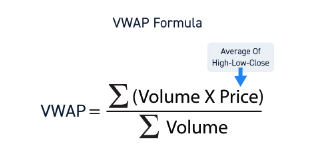

In [35]:
exchange_df.groupby('Ticker').apply(lambda x :(x['Volume']*x['Price']).sum()/x['Volume'].sum())

Ticker
AAPL      150.0
BTC       155.0
ETH      2550.0
GOOGL    2500.0
MSFT      300.0
XRP       310.0
dtype: float64

In [36]:
exchange_df

,Unnamed: 0,Timestamp,Ticker,Price,Volume,Buy/Sell,Trader_ID,Exchange,Hour
0,0,2022-01-01 00:00:00,AAPL,150,100,Buy,T1,NYSE,0
1,1,2022-01-01 00:00:01,GOOGL,2500,200,Sell,T2,NASDAQ,0
2,2,2022-01-01 00:00:02,MSFT,300,150,Buy,T3,NYSE,0
3,3,2022-01-01 00:00:03,BTC,155,110,Sell,T4,Binance,0
4,4,2022-01-01 00:00:04,ETH,2550,210,Buy,T5,Bybit,0
...,...,...,...,...,...,...,...,...,...
999995,999995,2022-01-12 13:46:35,XRP,310,160,Sell,T6,Coinbase,13
999996,999996,2022-01-12 13:46:36,AAPL,150,100,Buy,T1,NYSE,13
999997,999997,2022-01-12 13:46:37,GOOGL,2500,200,Sell,T2,NASDAQ,13
999998,999998,2022-01-12 13:46:38,MSFT,300,150,Buy,T3,NYSE,13
